# Non-Linear Pendulum

In [ ]:
"""Nama	: Alfianri Manihuruk
NIM 	: 120450088
Kelas 	: RB
Matkul	: Pemograman Berbasis Fungsi
"""


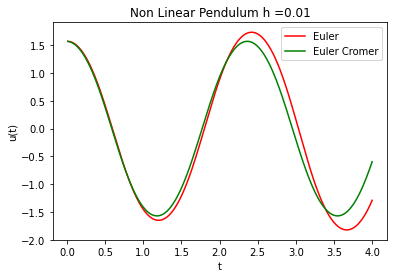

In [15]:
from solver import * # import module solver yang telah dibuat tadi
from math import *
import matplotlib.pyplot as plt

# membuat semua parameter yang dibutuhkan
g = 9.81          # gaya gravitasi
l = 1             # panjang pendulum 
k = 0             # koefisien
u0 = 0.5 * pi     # nilai alpha
du0 = 0           # diffrensial
t0 = 0            # waktu awal
t_akhir = 4       # waktu akhir
h = 0.01          # step
w0 = g/l

def Func(t,u,du):
    return -w0 * sin(u) - k*du #rumusnya

#membuat list kosong 
res_euler = []
res_eulercromer = []
t = []
step = int((t_akhir - t0) / h) #rumus step 1 yang akan menginput angka yang diketahui

for i in range(step): #melakukan perulangan untuk rumus yang telah di buat (step)
    tm = (i + 1) * h  #rumus step di kali ketinggian
    (u_next, du_next) = euler(tm, h, u0, du0, Func) # input nilai ke fungsi euler/ subtitusi nilai pada rumus euler
    res_euler.append(u_next) # menambahkan nilai ke list res_euler
    t.append(tm) # menambahkan hasilnya ke list t
    u0 = u_next
    du0 = du_next

# update setiap nilai
t = []
u0 = 0.5 * pi 
du0 = 0
d2u0 = Func(t0,u0,du0)

for i in range(step):
    tm = (i + 1) * h
    '''setelah step 1 dilakukan selanjutnya nilai yang di hasilkan di masukkan/subtitusi ke per 2 yaitu euler_cromer
    '''
    (u_next, du_next) = euler_cromer(tm, h, u0, du0, Func) # masukkan nilai  ke funsgi euler cromer
    res_eulercromer.append(u_next) # menambahkan nilai yang di hasilkan ke list res_eulercromer
    t.append(tm)# update nilai  t
    u0 = u_next
    du0 = du_next

# visualisasi hasil dari fungsi euler dan dan fungsi  euler_cromer
plt.title('Non Linear Pendulum h =0.01')
plt.plot(t,res_euler,color='r', label = 'Euler')
plt.plot(t,res_eulercromer,color='g', label = 'Euler Cromer')
plt.xlabel('t')
plt.ylabel('u(t)')
plt.legend()

plt.show()

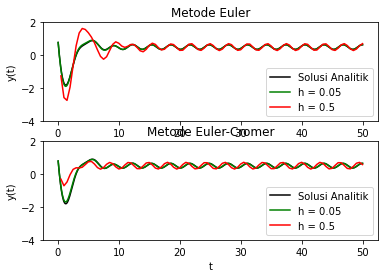

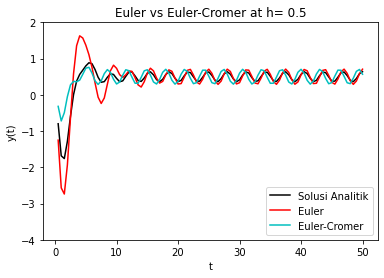

In [16]:
#import module yang telah dibuat dan library yang di butuhkan
from solver import *
from math import *
import matplotlib.pyplot as plt
from metode_euler import *


# example y" = -y - y' + sin^2(t)
#membuat fungsi Func
def Func(t,y,dy):
    return (-1 *y) + (-1 * dy) + sin(t)**2

#membuat fungsi eksak(mereturn rumus )
def eksak(t):
    return ((5/13)*exp(-0.5*t) * cos( 0.5 * sqrt(3) * t ) ) - ( 108/(13 * sqrt(3)) * exp(-0.5*t) * sin(0.5 * sqrt(3) * t )  ) + 0.5 + ((3/26) * cos(2*t)) - ((1/13)*sin(2*t))

#membuat  fungsi untuk mencari solusi analik dengan memasukan setiap parameter ke rumus yang telahh di buat tadi
def solusi_analitik(params):
    t0 = params['t0']
    t_akhir = params['t_akhir']
    h = params['h']
    step = int((t_akhir - t0) / h)
    t = []
    res_eksak = []
    for i in range(step):
        tm = (i + 1) * h
        y_next = eksak(tm)
        res_eksak.append(y_next)
        t.append(tm)
    return (t,res_eksak)

# membaut nilai paramer dalam bentuk dictionary
params = {
    't0' : 0,
    "t_akhir" : 50,
    "h" : 5 * 10**-2,
    "y0" : 1,
    "dy0" : -9/2
}

params2 = {
    't0' : 0,
    "t_akhir" : 50,
    "h" : 5 * 10**-1,
    "y0" : 1,
    "dy0" : -9/2
}

#membaut list kosong untuk setiap nilai yang di hasilkan
res_eksak = []
res_euler = []
res_euler_2 = []
res_eulercromer = []
res_eulercromer_2 = []
t = []

plt.subplot(2,1,1)


# visualisasi Plot Euler
(t,res_eksak) = solusi_analitik(params)
plt.plot(t,res_eksak,color='k',label='Solusi Analitik')

(t,res_euler) = cauchy_euler(params,Func)
plt.plot(t,res_euler,color='g', label = 'h = 0.05')

(t,res_euler_2) = cauchy_euler(params2,Func)
plt.plot(t,res_euler_2,color='r',label = 'h = 0.5')
plt.title('Metode Euler')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()
plt.subplot(2,1,2)

# visualisasi plot euler cromer
(t,res_eksak) = solusi_analitik(params)
plt.plot(t,res_eksak,color='k',label='Solusi Analitik')

(t,res_eulercromer) = cauchy_eulercromer(params,Func)
plt.plot(t,res_eulercromer,color='g', label = 'h = 0.05')

(t,res_eulercromer_2) = cauchy_eulercromer(params2,Func)
plt.plot(t,res_eulercromer_2,color='r',label = 'h = 0.5')
plt.title('Metode Euler-Cromer')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()
plt.figure()


# visualisasi plot comparison
(t,res_eksak) = solusi_analitik(params2)
plt.plot(t,res_eksak,color='k',label='Solusi Analitik')

(t,res_euler_2) = cauchy_euler(params2,Func)
plt.plot(t,res_euler_2,color='r',label = 'Euler ')

(t,res_eulercromer_2) = cauchy_eulercromer(params2,Func)
plt.plot(t,res_eulercromer_2,color='c',label = 'Euler-Cromer')
plt.title('Euler vs Euler-Cromer at h= 0.5')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.ylim(-4,2)
plt.legend()



plt.show()